In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt



In [2]:
model = models.resnet50(pretrained=True)
model = nn.Sequential(*list(model.children())[:4])  # Extract up to the first conv layer

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 206MB/s]


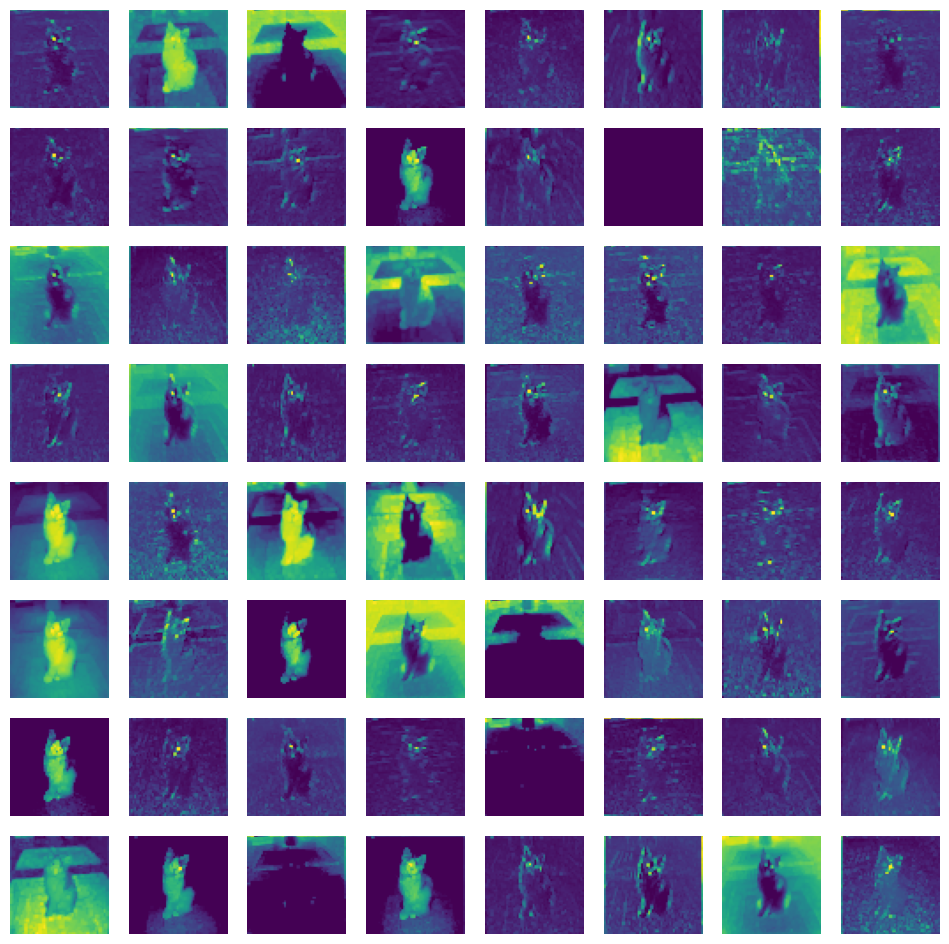

In [3]:
image = Image.open("/content/sample_data/cat.jpg")
input_tensor = preprocess(image).unsqueeze(0)

with torch.no_grad():
    activations = model(input_tensor)

activations = activations.squeeze().cpu().numpy()
num_filters = activations.shape[0]
plt.figure(figsize=(12, 12))
for i in range(num_filters):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations[i], cmap="viridis")
    plt.axis("off")
plt.show()